<a href="https://colab.research.google.com/github/jwjung3030/Glove/blob/master/rebalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#참고사이트
#https://github.com/HongJunhyoung/Snowball
#https://github.com/FinanceData/FinanceDataReader

#실행방법
getBackTest({'SPY':0.5, '153130':0.5})

종목코드와 비율을 입력하면 동작합니다. (비율의 합은 1이 되어야 합니다.)

데이터 세트는 날짜가 겹칩는 날을 기준으로 최소화 됩니다.

분배금(배당금)이 적용되지 않을 수 도 있습니다.

In [1]:
pip -q install finance-datareader

In [2]:
pip -q install snowball

     |████████████████████████████████| 23.9 MB 14 kB/s 


In [5]:
# KODEX 미국S&P500선물(H) : 219480.KS 2015년 05월 29일
# TIGER 미국S&P500선물(H) : 143850.KS 2011년 07월 18일
# KOSEF 미국달러선물 : 138230.KS 2011년 02월 24일
# KOSEF 국고채10년레버리지: 167860.KS 2011년 2012년 10월 30일
# KODEX 골드선물(H) : 132030.KS 2010년 10월 01일
# KINDEX 골드선물 레버리지(합성 H)225130.KS 2015년 07월 28일
# ARIRANG 신흥국MSCI(합성 H): 195980.KS 2014년 05월 13일
# KODEX MSCI EM선물(H) : 291890.KS 2018년 03월 23일
# ARIRANG 글로벌MSCI(합성 H): 189400.KS 2013년 12월 10일
# TIGER 미국나스닥100: 133690.KS 2010년 10월 18일
# KODEX 미국나스닥100선물(H): 304940.KS 2018년 08월 30일
# KINDEX 미국S&P500: 360200.KS 2020년 08월 07일
# KODEX 단기채권: 153130.KS 2012년 02월 22일
# TIGER 미국채10년선물: 305080.kS 2018년 08월 30일

              SPY  TLT  132030  153130
Date                                  
1993-02-01  44.25  NaN     NaN     NaN
1993-02-02  44.34  NaN     NaN     NaN
1993-02-03  44.81  NaN     NaN     NaN
1993-02-04  45.00  NaN     NaN     NaN
1993-02-05  44.97  NaN     NaN     NaN
-- DROP none data --
               SPY     TLT   132030   153130
Date                                        
2013-05-10  163.41  118.75  11300.0  90512.0
2013-05-13  163.54  117.84  11085.0  90520.0
2013-05-14  165.23  116.56  11135.0  90543.0
2013-05-15  166.12  117.34  10995.0  90567.0
2013-05-16  165.34  118.56  10790.0  90570.0
               SPY     TLT   132030    153130
Date                                         
2021-09-10  445.44  148.40  12205.0  102895.0
2021-09-13  446.58  149.30  12120.0  102900.0
2021-09-14  444.17  151.11  12135.0  102890.0
2021-09-15  447.88  150.58  12200.0  102895.0
2021-09-16  447.17  149.89  12085.0  102920.0


  0%            (DATE) 0/1995 |                     Elapsed 00:00 | Remaining ? | ?s/it

__[ Backtest Log ]__

No,Event,Date,Message
1,Rebalancing,2013-05-31,4 trades
2,,2013-06-28,4 trades
···,,·····,·····
99,,2021-07-30,4 trades
100,,2021-08-31,4 trades


__[ Porfolio Performance ]__

- _2013-05-31 ~ 2021-09-16 ( 8 years 4 months )_

,MTD,YTD,1Y,5Y,10Y,CAGR,Volatility,Sharpe,MDD
Portfolio,-0.52%,+2.11%,+2.29%,+34.49%,N/A,+5.47%,+5.89%,0.93,-10.70%


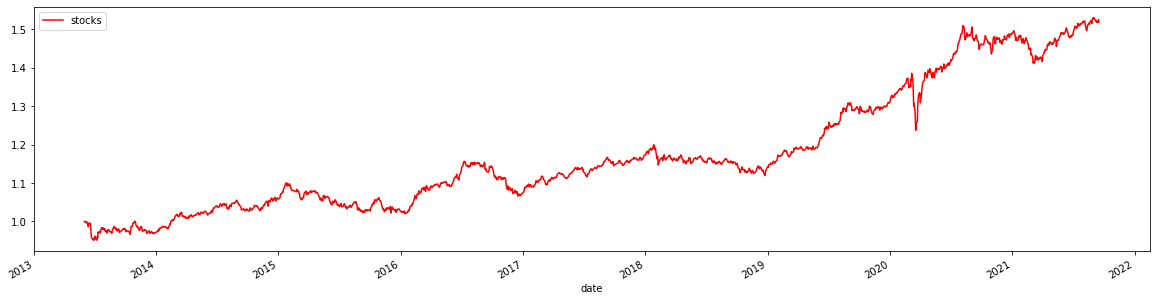

In [9]:
import FinanceDataReader as fdr
import pandas as pd
import snowball as sb

def getStockData(stcklist = ['360200', '304940']):
  stocks = stcklist

  data = pd.DataFrame()
  for stock in stocks:

    if data.empty:
      df1 = pd.DataFrame(fdr.DataReader(stock)['Close'])
      df1 = df1.reset_index()
      df1.set_index('Date', inplace=True)
      df1.columns = [stock]
      data = df1

    else:
      df2 = pd.DataFrame(fdr.DataReader(stock)['Close'])
      df2 = df2.reset_index()
      df2.set_index('Date', inplace=True)
      df2.columns = [stock]
      data = data.join(df2, on='Date', how='left')

  df_dop_row = data.dropna(axis=0)
  print(data.head())
  print('-- DROP none data --')
  print(df_dop_row.head())
  print(df_dop_row.tail())
  data = df_dop_row

  return data

def drawGraph(df):
  import itertools
  import numpy as np

  df['addone'] = df['return']+1
  monthly_income = df['addone'].to_list()
  result = np.cumprod(monthly_income)
  df['stocks'] = result
  df.head().to_csv('head.csv')
  df.tail().to_csv('tail.csv')

  import matplotlib.pyplot as plt
  df.plot(kind='line', y='stocks', color='red', figsize=(20, 5))
  plt.show()

def showInfo(bal64):
  df_stats = pd.DataFrame.from_dict(bal64.stats, orient='index', columns=['Portfolio'])
  df_stats_transposed = df_stats.T
  df_stats_transposed

def getBackTest(stock_weight={'360200':0.5, '304940':0.5}, pstart = None):

  stocklist = list(stock_weight)
  data = getStockData(stocklist) 

  bal64 = sb.backtest(prices=data, 
                      schedule='EOM', 
                      weight=stock_weight,
                      start = pstart)
                        
  bal64.report()

  drawGraph(bal64.returns)

# getBackTest({'360200':0.5, '304940':0.5})
# getBackTest({'219480':0.5, '133690':0.5}, pstart = "2020-08-31")
# getBackTest({'219480':0, '133690':1}, pstart = "2020-08-31")
# getBackTest({'360200':0, '304940':1}, pstart = "2020-08-31")
# getBackTest({'SPY':0.25, '305080':0.25, '132030':0.25, '153130':0.25})
getBackTest({'SPY':0.25, 'TLT':0.25, '132030':0.25, '153130':0.25})